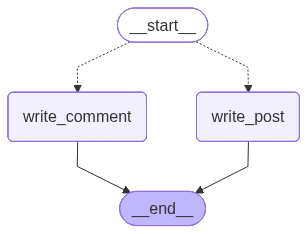

In [8]:
from typing import List
from langgraph.graph import StateGraph, END
from state import LLMState
from nodes.nodes import LLMNodes
from langchain.chat_models import init_chat_model


llm = init_chat_model('ollama:gpt-oss')
self = LLMNodes(llm)

builder = StateGraph(LLMState)

builder.add_node('write_post', self.write_post)
builder.add_node('write_comment', self.write_comment)

builder.set_conditional_entry_point(self.decide_action,
                                            {'write_post': 'write_post',
                                            'write_comment': 'write_comment'})

builder.add_edge('write_post', END)
builder.add_edge('write_comment', END)

graph = builder.compile()
graph